In [1]:
!pip install scikit-optimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.9 MB/s eta 0:00:00


In [2]:
df = pd.read_excel("Dataset#1.xlsx")
df

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset#1.xlsx'

In [ ]:
df.info()
df.duplicated(subset=None, keep='first').sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   13611 non-null  int64  
 1   Feature2   13611 non-null  float64
 2   Feature3   13611 non-null  float64
 3   Feature4   13611 non-null  float64
 4   Feature5   13611 non-null  float64
 5   Feature6   13611 non-null  float64
 6   Feature7   13611 non-null  int64  
 7   Feature8   13611 non-null  float64
 8   Feature9   13611 non-null  float64
 9   Feature10  13611 non-null  float64
 10  Feature11  13611 non-null  float64
 11  Feature12  13611 non-null  float64
 12  Feature13  13611 non-null  float64
 13  Feature14  13611 non-null  float64
 14  Feature15  13611 non-null  float64
 15  Feature16  13611 non-null  float64
 16  Class      13611 non-null  object 
dtypes: float64(14), int64(2), object(1)
memory usage: 1.8+ MB


68

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
df.duplicated(subset=None, keep='first').sum()

0

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


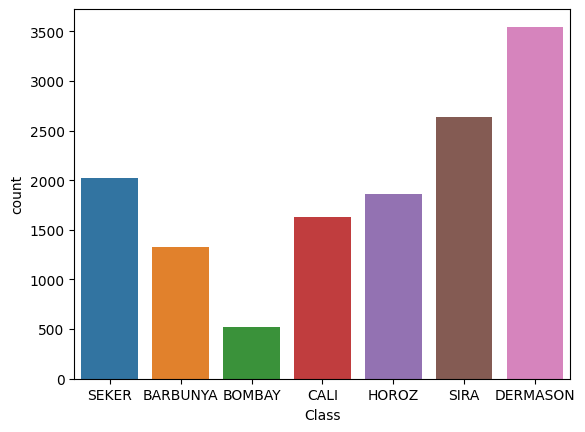

In [ ]:
print(df['Class'].value_counts())
plot = sns.countplot(x='Class', data=df)

In [ ]:
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [ ]:
X = df.drop("Class", axis=1)
y = df['Class']

## **Train , Validation, Test Spliting**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["Class"])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## Imbalance Treatment

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

2    2837
0    2837
4    2837
6    2837
3    2837
5    2837
1    2837
Name: Class, dtype: int64


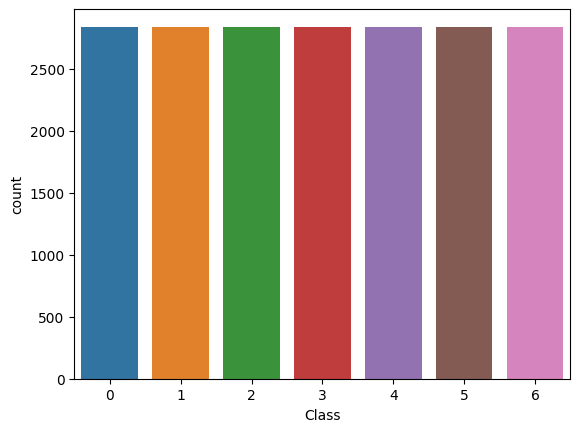

In [ ]:
print(y_train.value_counts())
plot = sns.countplot(x=y_train)

## **Data Scaling**

In [ ]:
cols = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature7", "Feature8", "Feature9", "Feature10", "Feature11", "Feature12", "Feature13", "Feature14", "Feature15", "Feature16"]
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

X_test_scaled = sc.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)

## **Heatmap Corr**

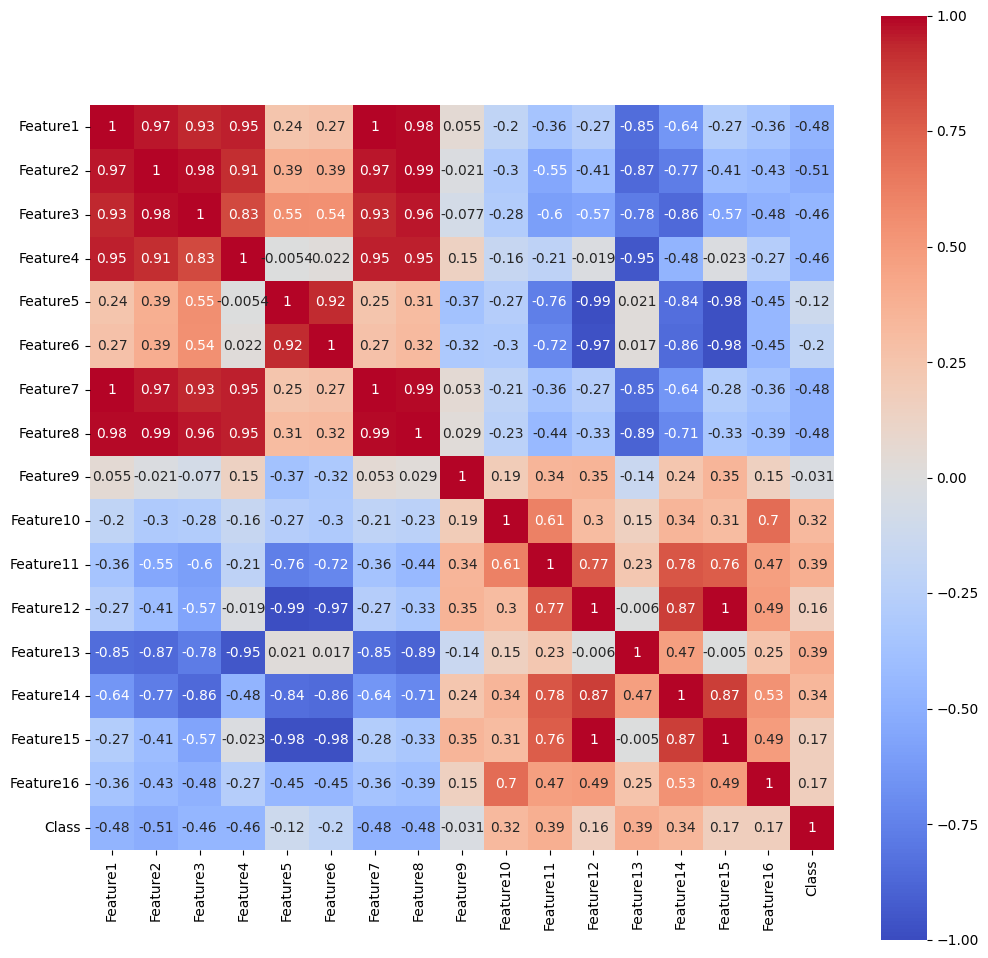

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)
correlation_matrix = df.corr("pearson")

## **Feature Selection**

In [ ]:
correlation_matrix = X_train.corr()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16
Feature1,1.000000,0.979186,0.958441,0.976338,0.116940,0.210449,0.999964,0.991319,0.184440,-0.091961,-0.201425,-0.168279,-0.902782,-0.660593,-0.181320,-0.345787
Feature2,0.979186,1.000000,0.985774,0.954783,0.232358,0.317984,0.979803,0.994681,0.123546,-0.191426,-0.368057,-0.283181,-0.918753,-0.764820,-0.295298,-0.405882
Feature3,0.958441,0.985774,1.000000,0.904137,0.371500,0.441428,0.958982,0.976440,0.074628,-0.180898,-0.411398,-0.418248,-0.860473,-0.835887,-0.428357,-0.458793
Feature4,0.976338,0.954783,0.904137,1.000000,-0.053507,0.048154,0.976190,0.974885,0.247177,-0.074369,-0.115289,0.001365,-0.960113,-0.560881,-0.012643,-0.278744
Feature5,0.116940,0.232358,0.371500,-0.053507,1.000000,0.926742,0.118264,0.166010,-0.384299,-0.252049,-0.736347,-0.987644,0.073462,-0.754257,-0.978670,-0.445997
Feature6,0.210449,0.317984,0.441428,0.048154,0.926742,1.000000,0.211953,0.257310,-0.319730,-0.298345,-0.721880,-0.971964,-0.017247,-0.825445,-0.982261,-0.468271
Feature7,0.999964,0.979803,0.958982,0.976190,0.118264,0.211953,1.000000,0.991499,0.182937,-0.099318,-0.205083,-0.169839,-0.902955,-0.661892,-0.182901,-0.350589
Feature8,0.991319,0.994681,0.976440,0.974885,0.166010,0.257310,0.991499,1.000000,0.164361,-0.129404,-0.272455,-0.217956,-0.931937,-0.719517,-0.230775,-0.374864
Feature9,0.184440,0.123546,0.074628,0.247177,-0.384299,-0.319730,0.182937,0.164361,1.000000,0.206687,0.349538,0.361456,-0.246243,0.153179,0.352886,0.123868
Feature10,-0.091961,-0.191426,-0.180898,-0.074369,-0.252049,-0.298345,-0.099318,-0.129404,0.206687,1.000000,0.609210,0.293549,0.107437,0.309488,0.299590,0.670308


In [ ]:
threshold = 0.95
correlated_features = set()

In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

{'Feature12',
 'Feature13',
 'Feature15',
 'Feature2',
 'Feature3',
 'Feature4',
 'Feature7',
 'Feature8'}

In [ ]:
X_train = X_train.drop(columns=correlated_features)
X_val = X_val.drop(columns=correlated_features)
X_test = X_test.drop(columns=correlated_features)

## **SVM**

In [ ]:
classifier= SVC(C=34.5,gamma=0.092,tol=0.091)

classifier = classifier.fit(X_train, y_train)

y_pred_svm = classifier.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_svm)
conf_matrix = confusion_matrix(y_val, y_pred_svm)
classification_rep = classification_report(y_val, y_pred_svm)

In [ ]:
print(f'SVM Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

SVM Accuracy: 0.9224519940915805
Confusion Matrix:
[[117   0  11   0   0   1   4]
 [  0  52   0   0   0   0   0]
 [  7   0 152   0   2   1   1]
 [  0   0   0 318   0   6  30]
 [  0   0   3   2 176   0   5]
 [  3   0   1   1   0 196   2]
 [  2   0   0  16   4   3 238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       133
           1       1.00      1.00      1.00        52
           2       0.91      0.93      0.92       163
           3       0.94      0.90      0.92       354
           4       0.97      0.95      0.96       186
           5       0.95      0.97      0.96       203
           6       0.85      0.90      0.88       263

    accuracy                           0.92      1354
   macro avg       0.93      0.93      0.93      1354
weighted avg       0.92      0.92      0.92      1354



## RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_rf)
conf_matrix = confusion_matrix(y_val, y_pred_rf)
classification_rep = classification_report(y_val, y_pred_rf)

In [ ]:
print(f'RF Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

RF Accuracy: 0.8988183161004432
Confusion Matrix:
[[116   0   9   0   1   1   6]
 [  0  52   0   0   0   0   0]
 [  5   0 150   0   5   1   2]
 [  0   0   0 308   1   5  40]
 [  1   0   3   1 178   0   3]
 [  5   0   0   4   0 188   6]
 [  5   0   4  22   5   2 225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       133
           1       1.00      1.00      1.00        52
           2       0.90      0.92      0.91       163
           3       0.92      0.87      0.89       354
           4       0.94      0.96      0.95       186
           5       0.95      0.93      0.94       203
           6       0.80      0.86      0.83       263

    accuracy                           0.90      1354
   macro avg       0.91      0.91      0.91      1354
weighted avg       0.90      0.90      0.90      1354



## KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_knn)
conf_matrix = confusion_matrix(y_val, y_pred_knn)
classification_rep = classification_report(y_val, y_pred_knn)

In [ ]:
print(f'KNN Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

KNN Accuracy: 0.8892171344165436
Confusion Matrix:
[[116   0  10   0   0   0   7]
 [  0  52   0   0   0   0   0]
 [  6   0 152   0   2   1   2]
 [  1   0   0 299   0   8  46]
 [  0   0   6   1 176   0   3]
 [  5   0   1   6   0 186   5]
 [  3   0   2  30   3   2 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       133
           1       1.00      1.00      1.00        52
           2       0.89      0.93      0.91       163
           3       0.89      0.84      0.87       354
           4       0.97      0.95      0.96       186
           5       0.94      0.92      0.93       203
           6       0.78      0.85      0.81       263

    accuracy                           0.89      1354
   macro avg       0.91      0.91      0.91      1354
weighted avg       0.89      0.89      0.89      1354



## **PCA**

In [ ]:
pca = PCA(random_state=22)
pca.fit(X_train)
loadings = pca.components_
num_pc = pca.n_features_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pca = PCA(n_components=5, random_state=22)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

## **RF PCA**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_val)


In [ ]:
accuracy = accuracy_score(y_val, y_pred_rf)
conf_matrix = confusion_matrix(y_val, y_pred_rf)
classification_rep = classification_report(y_val, y_pred_rf)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8988183161004432
Confusion Matrix:
[[116   0   9   0   1   1   6]
 [  0  52   0   0   0   0   0]
 [  5   0 150   0   5   1   2]
 [  0   0   0 308   1   5  40]
 [  1   0   3   1 178   0   3]
 [  5   0   0   4   0 188   6]
 [  5   0   4  22   5   2 225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       133
           1       1.00      1.00      1.00        52
           2       0.90      0.92      0.91       163
           3       0.92      0.87      0.89       354
           4       0.94      0.96      0.95       186
           5       0.95      0.93      0.94       203
           6       0.80      0.86      0.83       263

    accuracy                           0.90      1354
   macro avg       0.91      0.91      0.91      1354
weighted avg       0.90      0.90      0.90      1354



## **KNN PCA**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_knn)
conf_matrix = confusion_matrix(y_val, y_pred_knn)
classification_rep = classification_report(y_val, y_pred_knn)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8862629246676514
Confusion Matrix:
[[116   0  10   0   0   1   6]
 [  0  52   0   0   0   0   0]
 [  4   0 152   0   3   1   3]
 [  1   0   0 296   0   9  48]
 [  0   0  10   1 172   0   3]
 [  5   0   1   6   0 185   6]
 [  3   0   1  27   3   2 227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       133
           1       1.00      1.00      1.00        52
           2       0.87      0.93      0.90       163
           3       0.90      0.84      0.87       354
           4       0.97      0.92      0.95       186
           5       0.93      0.91      0.92       203
           6       0.77      0.86      0.82       263

    accuracy                           0.89      1354
   macro avg       0.91      0.91      0.91      1354
weighted avg       0.89      0.89      0.89      1354



## **SVM PCA**

In [ ]:
classifier= SVC(C=34.5,gamma=0.092,tol=0.091)

classifier = classifier.fit(X_train, y_train)
y_pred_svm = classifier.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_svm)
conf_matrix = confusion_matrix(y_val, y_pred_svm)
classification_rep = classification_report(y_val, y_pred_svm)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9224519940915805
Confusion Matrix:
[[117   0  11   0   0   1   4]
 [  0  52   0   0   0   0   0]
 [  7   0 152   0   2   1   1]
 [  0   0   0 318   0   6  30]
 [  0   0   3   2 176   0   5]
 [  3   0   1   1   0 196   2]
 [  2   0   0  16   4   3 238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       133
           1       1.00      1.00      1.00        52
           2       0.91      0.93      0.92       163
           3       0.94      0.90      0.92       354
           4       0.97      0.95      0.96       186
           5       0.95      0.97      0.96       203
           6       0.85      0.90      0.88       263

    accuracy                           0.92      1354
   macro avg       0.93      0.93      0.93      1354
weighted avg       0.92      0.92      0.92      1354



## **SVM Grid Search**

In [ ]:
param_grid = {'C': [1, 10, 20, 30, 40, 50],
              'gamma': [0.001, 0.01, 0.1, 1, 10],
              'tol': [0.001, 0.01, 0.1, 1]}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svc_model = SVC(**best_params)

best_svc_model.fit(X_train, y_train)

SVC(C=40, gamma=0.1, tol=0.1)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 40, 'gamma': 0.1, 'tol': 0.1}


In [ ]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9143911439114392
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       1.00      1.00      1.00        52
           2       0.93      0.94      0.94       163
           3       0.91      0.89      0.90       355
           4       0.95      0.94      0.94       186
           5       0.92      0.95      0.93       203
           6       0.85      0.87      0.86       264

    accuracy                           0.91      1355
   macro avg       0.93      0.93      0.93      1355
weighted avg       0.91      0.91      0.91      1355



## **SVM Bayes Search**

In [ ]:
param_space = {'C': (1e-6, 1e+6, 'log-uniform'),
               'gamma': (1e-6, 1e+1, 'log-uniform'),
               'degree': (1, 8),
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
opt = BayesSearchCV(SVC(), param_space, n_iter=50, cv=5)
opt.fit(X_train, y_train)

In [ ]:
best_params = opt.best_params_
print("Best Parameters:", best_params)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)